# Clash of Clans CWL

## Unsupervised Machine Learning

* Your Name: Nolan Clark
* Name of API: Clash of Clans API
* Link to main page of API documentation: https://developer.clashofclans.com/#/documentation

In [1]:
import CWL_Functions as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("JulyModelDF.csv",index_col=0, keep_default_na=False, na_values='')
july = pd.read_csv("CC_July.csv",index_col=0, keep_default_na=False, na_values='')
july.rename(columns={'rank':'group_rank'}, inplace = True)
coop=july[july['clan_tag'] == '#2QVRL0RR']
july_extra = pd.read_csv("CC_July_Performance.csv",index_col=0, keep_default_na=False, na_values='')
clans_extra = pd.read_csv("JulyCWLgroupPerformanceDF.csv",index_col=0, keep_default_na=False, na_values='')
master1 =df[df.league == 'Master League I']
clans=df.groupby(['clan_tag','league','result','group_rank']).sum().reset_index()
m_clans =master1.groupby(['clan_tag','league','result','group_rank']).sum().reset_index()

/Users/Nolan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Hierarchial Clustering

## Clan performance against other clans

Our bracket had two clans that performed well enough for promotion and one clan that performed poor enough for demotion.

2nd place and 7th place unlucky to be in our bracket.

In [3]:
result_map = {'PROMOTED':0,
              'REMAINED':1,
              'DROPPED':2}
clans_extra['result_mapped']=clans_extra['result'].map(result_map)
clans['result_mapped']=clans['result'].map(result_map)
july['result_mapped']=july['result'].map(result_map)
july_sum=july.groupby(['clan','clan_tag','group_rank','result_mapped']).sum().reset_index()
m_clans['result_mapped']=m_clans['result'].map(result_map)

In [4]:
league_order = [ 'Gold League III',
                'Gold League II',
                'Gold League I',
                'Crystal League III',
                'Crystal League II',
                'Crystal League I',
                'Master League III',
                'Master League II',
                'Master League I',
                'Champion League III',
                'Champion League II',
                'Champion League I'
               ]
league_map = {x[1]:x[0] for x in enumerate(league_order)}
clans['league_mapped']=clans['league'].map(league_map)

In [5]:
crew=coop.groupby('name').sum()
crew_avg=coop.groupby('name').mean()


In [6]:
july_extra.merge(july_sum[['clan','clan_tag']], on = 'clan_tag')

,clan_tag,group_num,Tot_Clan_Damage,Tot_Clan_Stars,group_rank,result,clan
0,#2CLV82JR,0,614.733333,318,1.0,PROMOTED,HANOI SAIGON
1,#2PQUYYY9U,0,496.333333,215,6.0,REMAINED,Dj Clan❤️cwl
2,#2QVRL0RR,0,534.066667,261,3.0,REMAINED,coops crew
3,#88GJQY2V,0,484.933333,209,7.0,DROPPED,Setima Legião
4,#8J29C,0,532.933333,241,5.0,REMAINED,The Towers
5,#8U2VLU8Q,0,442.600000,181,8.0,DROPPED,Springfield
6,#9P9JGJ0V,0,507.866667,249,4.0,REMAINED,metal mulisha
7,#J9U2VPQR,0,594.400000,295,2.0,REMAINED,U.J.E.S.A.


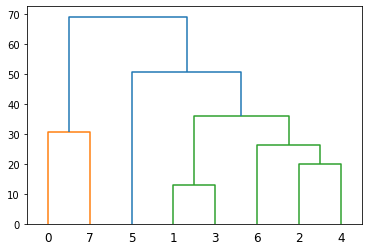

In [7]:
ld=linkage(july_extra[['Tot_Clan_Damage','Tot_Clan_Stars']])
dendrogram(ld)
plt.show()

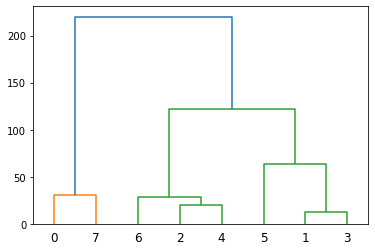

In [8]:
ld=linkage(july_extra[['Tot_Clan_Damage','Tot_Clan_Stars']], method = 'complete')
dendrogram(ld)
plt.show()

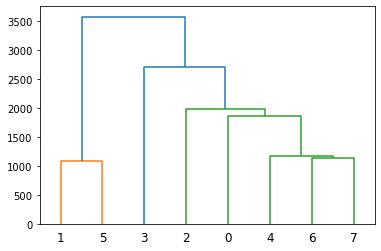

In [9]:
# Pretty close to final without including the +10 star bonus

ld=linkage(july_sum[['attack_trans','def_trans']], method = 'single', metric = 'euclidean')
dendrogram(ld)
plt.show()

In [10]:
july_sum.reset_index()[['clan','group_rank']]

,clan,group_rank
0,Dj Clan❤️cwl,6.0
1,HANOI SAIGON,1.0
2,Setima Legião,7.0
3,Springfield,8.0
4,The Towers,5.0
5,U.J.E.S.A.,2.0
6,coops crew,3.0
7,metal mulisha,4.0


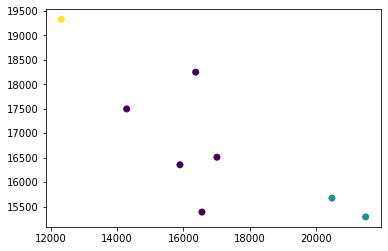

In [11]:
# Good predictor of result during CWL

DATA = july_sum
X = 'attack_trans'
Y = 'def_trans'


hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels = hc.fit_predict(DATA[[X,Y]])
plt.scatter(data=DATA, x=X,y=Y,c=labels)
plt.show()

## Clan performance within clan

Snapper outlier

In [12]:
coop.groupby('name').sum().reset_index()

,name,mapPosition,TH_lvl,A_stars,A_Percent,A_order,A_duration,D_stars,D_Percent,D_order,D_duration,attack_trans,def_trans,star_diff,group_rank
0,Col’s the First,61,105,13.0,514.0,152.0,1064.0,14.0,488.0,149.0,783.0,973.0,976.0,-1.0,21.0
1,Great Assassin,16,105,13.0,443.0,58.0,1124.0,14.0,549.0,127.0,1015.0,847.0,1216.0,-1.0,21.0
2,Mosh,83,105,13.0,588.0,125.0,750.0,14.0,512.0,103.0,906.0,1092.0,1024.0,-1.0,21.0
3,One⭐️Specialist,70,105,15.0,572.0,63.0,1149.0,12.0,477.0,79.0,916.0,1244.0,850.0,3.0,21.0
4,Snapper805,175,105,15.0,465.0,31.0,663.0,20.0,660.0,110.0,921.0,1030.0,1920.0,-5.0,21.0
5,Steve,57,105,18.0,597.0,63.0,1168.0,12.0,465.0,159.0,1019.0,1594.0,824.0,6.0,21.0
6,Tank,7,105,16.0,613.0,40.0,1221.0,14.0,484.0,91.0,911.0,1426.0,968.0,2.0,21.0
7,Tyson,48,105,12.0,472.0,160.0,866.0,16.0,542.0,116.0,838.0,811.0,1284.0,-4.0,21.0
8,Wingward,33,105,12.0,513.0,142.0,814.0,15.0,530.0,105.0,844.0,1026.0,1160.0,-1.0,21.0
9,ballin,22,105,16.0,638.0,14.0,1214.0,13.0,544.0,115.0,883.0,1476.0,1033.0,3.0,21.0


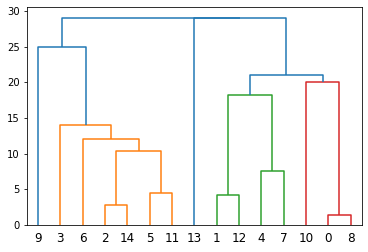

In [13]:
ld=linkage(coop.groupby('name').sum()[['A_stars','A_Percent']])

dendrogram(ld)
plt.show()

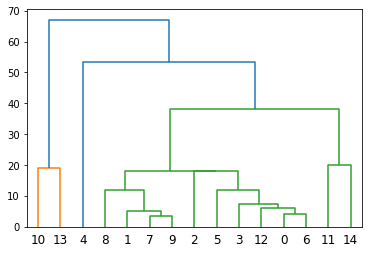

In [14]:
ld=linkage(coop.groupby('name').sum()[['D_stars','D_Percent']])

dendrogram(ld)
plt.show()

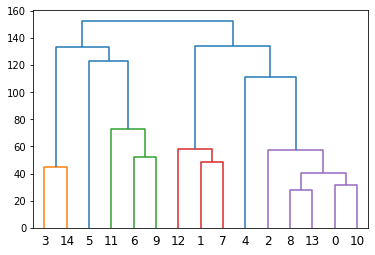

In [15]:
ld=linkage(coop.groupby('name').sum()[['attack_trans','mapPosition']])

dendrogram(ld)
plt.show()

In [16]:
scale = StandardScaler()
X = crew[['attack_trans','def_trans']]
scaledX = scale.fit_transform(X)
scaledX

array([[-0.65564854, -0.43867119],
       [-1.16812817,  0.40628135],
       [-0.17164   , -0.26968069],
       [ 0.44658939, -0.88227128],
       [-0.42381252,  2.8848088 ],
       [ 1.87014392, -0.9738078 ],
       [ 1.18683775, -0.46683628],
       [-1.31455092,  0.64568457],
       [-0.44008171,  0.20912575],
       [ 1.39020268, -0.23799497],
       [-0.60277366, -0.85410619],
       [ 1.08922258,  0.80411317],
       [-1.43656988, -0.23447433],
       [-0.33026465, -1.3399539 ],
       [ 0.56047375,  0.747783  ]])

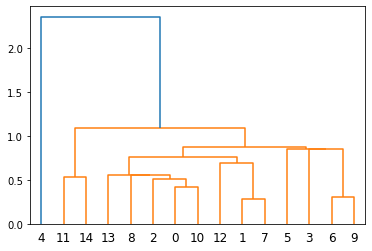

In [17]:
ld=linkage(scaledX)

dendrogram(ld)
plt.show()

## League clusters

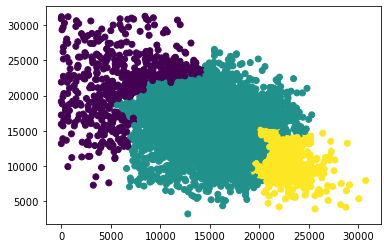

In [18]:
X = 'attack_trans'
Y = 'def_trans'

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = hc.fit_predict(clans[[X,Y]])
plt.scatter(data=clans, x=X,y=Y,c=labels)
plt.show()

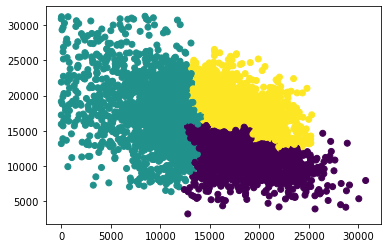

In [19]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(clans[[X,Y]])
plt.scatter(data=clans, x=X,y=Y,c=labels)
plt.show()

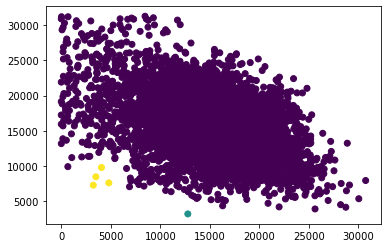

In [20]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels = hc.fit_predict(clans[[X,Y]])
plt.scatter(data=clans, x=X,y=Y,c=labels)
plt.show()

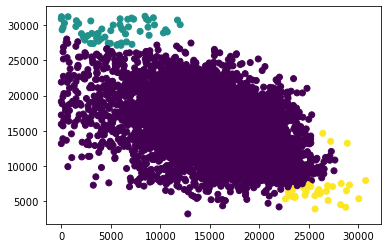

In [21]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels = hc.fit_predict(clans[[X,Y]])
plt.scatter(data=clans, x=X,y=Y,c=labels)
plt.show()

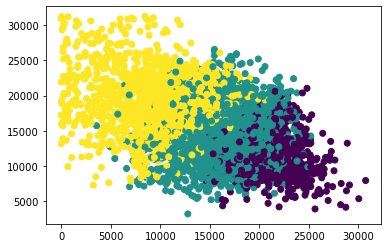

In [22]:
# Close to complete linkage
plt.scatter(data=clans, x=X,y=Y,c='result_mapped')
plt.show()

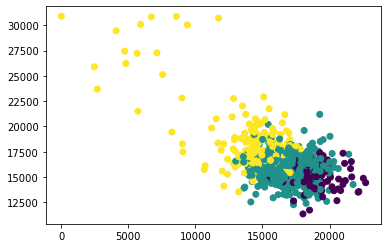

In [23]:
# Close to complete linkage
plt.scatter(data=m_clans, x=X,y=Y,c='result_mapped')
plt.show()

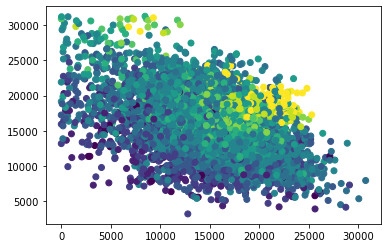

In [24]:
# Somewhat like ward linkage
plt.scatter(data=clans, x=X,y=Y,c='league_mapped')
plt.show()

## K-means

The elbow method shows different values for K. When the line shifts inertia, that is a good estimate for the best value of K based on the data.

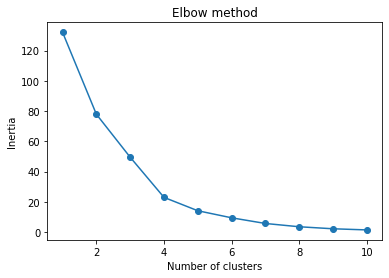

In [25]:
# Elbow method suggests 4

data = crew[['A_stars','D_stars']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

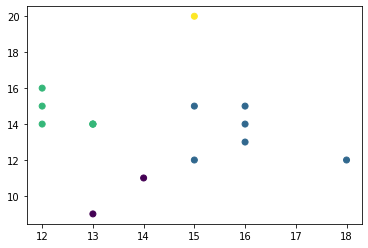

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(data = crew, x='A_stars',y='D_stars', c=kmeans.labels_)
plt.show()

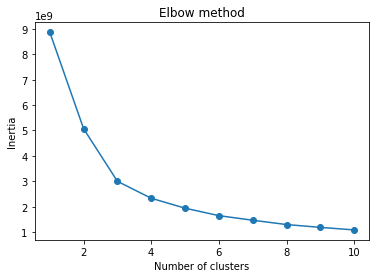

In [27]:
data = m_clans[['attack_trans','def_trans']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

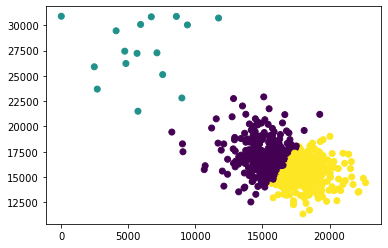

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data = m_clans, x='attack_trans',y='def_trans', c=kmeans.labels_)
plt.show()

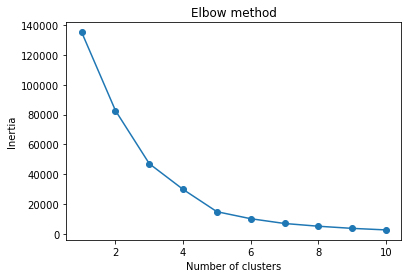

In [29]:
data = crew[['A_Percent','D_Percent']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

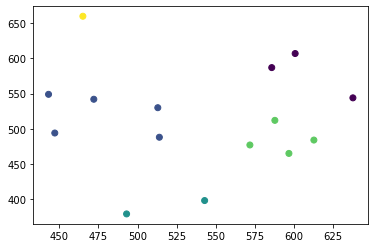

In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(data = crew, x='A_Percent',y='D_Percent', c=kmeans.labels_)
plt.show()

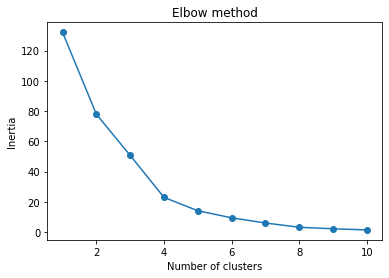

In [31]:
data = crew[['A_stars','D_stars']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

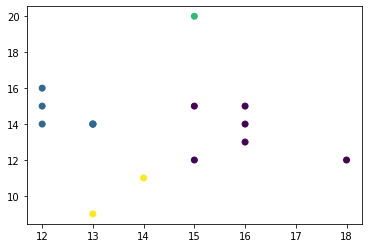

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(data = crew, x='A_stars',y='D_stars', c=kmeans.labels_)
plt.show()

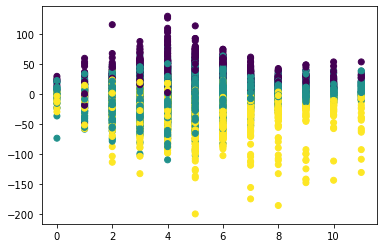

In [33]:
plt.scatter(data = clans, y='star_diff',x='league_mapped', c='result_mapped')
plt.show()

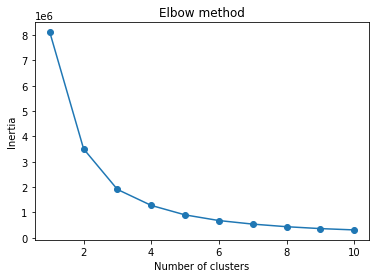

In [34]:
data = clans[['star_diff','league_mapped']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

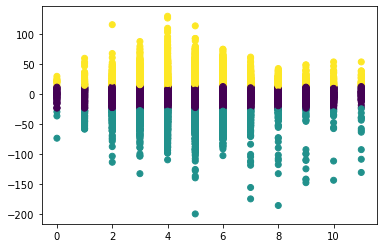

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data = clans, y='star_diff',x='league_mapped', c=kmeans.labels_)
plt.show()

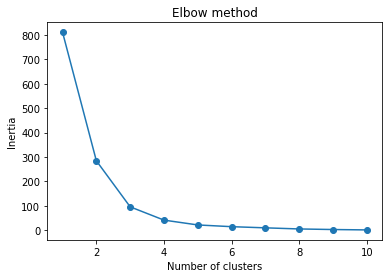

In [36]:
data = crew_avg[['D_stars','D_Percent']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

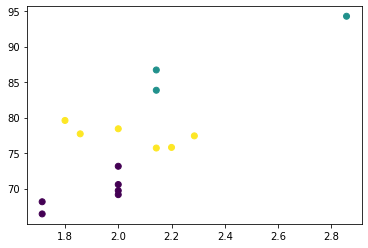

In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data = crew_avg, x='D_stars',y='D_Percent', c=kmeans.labels_)
plt.show()

In [38]:
crew_avg.sort_values(by='D_Percent', ascending=False)

,mapPosition,TH_lvl,A_stars,A_Percent,A_order,A_duration,D_stars,D_Percent,D_order,D_duration,attack_trans,def_trans,star_diff,group_rank
name,,,,,,,,,,,,,,
Snapper805,25.000000,15.0,2.142857,66.428571,4.428571,94.714286,2.857143,94.285714,15.714286,131.571429,147.142857,274.285714,-0.714286,3.0
goblingetter,10.857143,15.0,2.285714,85.857143,4.714286,166.428571,2.142857,86.714286,22.142857,142.571429,200.285714,189.857143,0.142857,3.0
⚡fireboLt⚡,15.000000,15.0,2.142857,83.714286,6.142857,139.571429,2.142857,83.857143,17.428571,144.714286,181.714286,187.571429,0.000000,3.0
nolan,5.857143,15.0,1.857143,77.571429,23.142857,164.142857,1.800000,79.600000,18.400000,128.200000,150.428571,144.000000,0.000000,3.0
Great Assassin,2.285714,15.0,1.857143,63.285714,8.285714,160.571429,2.000000,78.428571,18.142857,145.000000,121.000000,173.714286,-0.142857,3.0
ballin,3.142857,15.0,2.285714,91.142857,2.000000,173.428571,1.857143,77.714286,16.428571,126.142857,210.857143,147.571429,0.428571,3.0
Tyson,6.857143,15.0,1.714286,67.428571,22.857143,123.714286,2.285714,77.428571,16.571429,119.714286,115.857143,183.428571,-0.571429,3.0
coop,4.571429,15.0,2.000000,70.428571,14.571429,148.714286,2.200000,75.800000,22.200000,144.800000,140.857143,171.600000,-0.200000,3.0
Wingward,4.714286,15.0,2.000000,85.500000,23.666667,135.666667,2.142857,75.714286,15.000000,120.571429,171.000000,165.714286,-0.166667,3.0


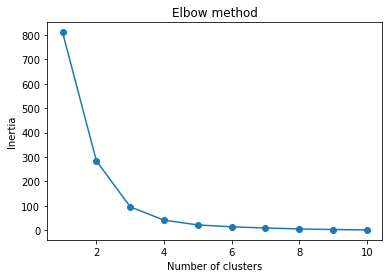

In [39]:
data = crew_avg[['D_Percent','D_stars']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

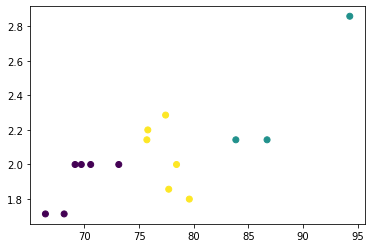

In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data = crew_avg, x='D_Percent',y='D_stars', c=kmeans.labels_)
plt.show()

In [41]:
mid_step=pd.Series(df.groupby(['tag','name','clan','clan_tag','group_rank','TH_lvl','league','result'])['A_Percent'].count() == 7, name = 'Attack_count')

In [42]:
ppl=df.groupby(['tag','name','clan','clan_tag','group_rank','TH_lvl','league','result']).sum()

In [43]:
sum7=ppl[mid_step].reset_index()

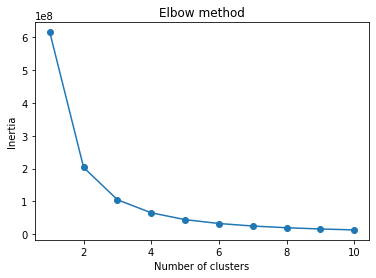

In [44]:
# Elbow method suggests 4

data = sum7[['A_stars','A_Percent']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

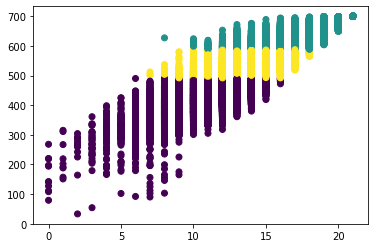

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data = sum7, x='A_stars',y='A_Percent', c=kmeans.labels_)
plt.show()

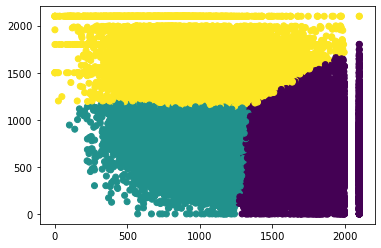

In [46]:
data = sum7[['attack_trans','def_trans']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data = sum7, x='attack_trans',y='def_trans', c=kmeans.labels_)
plt.show()

In [47]:
league_order = [ 'Gold League III',
                'Gold League II',
                'Gold League I',
                'Crystal League III',
                'Crystal League II',
                'Crystal League I',
                'Master League III',
                'Master League II',
                'Master League I',
                'Champion League III',
                'Champion League II',
                'Champion League I'
               ]
league_map = {x[1]:x[0] for x in enumerate(league_order)}
sum7['league_mapped']=sum7['league'].map(league_map)
sum7['result_mapped']=sum7['result'].map(result_map)

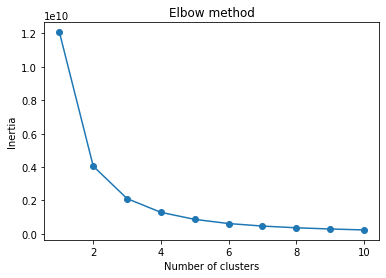

In [48]:
# Elbow method suggests 4

data = sum7[['attack_trans','league_mapped']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

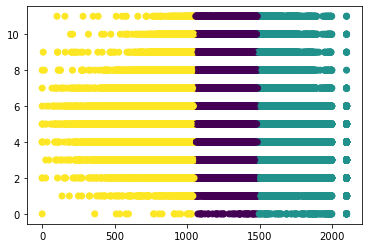

In [49]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data = sum7, x='attack_trans',y='league_mapped', c=kmeans.labels_)
plt.show()

## K-nearest neighbors
supervised clustering

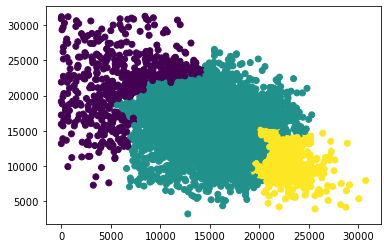

In [50]:
X = 'attack_trans'
Y = 'def_trans'

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = hc.fit_predict(clans[[X,Y]])
plt.scatter(data=clans, x=X,y=Y,c=labels)
plt.show()

In [51]:
data =m_clans
features = ['attack_trans','def_trans']

classes = 'result_mapped'

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(m_clans[features], m_clans[classes])

KNeighborsClassifier(n_neighbors=1)

In [52]:
m_clans

,clan_tag,league,result,group_rank,mapPosition,TH_lvl,A_stars,A_Percent,A_order,A_duration,D_stars,D_Percent,D_order,D_duration,attack_trans,def_trans,star_diff,result_mapped
0,#2008CL99C,Master League I,REMAINED,2.0,995,1570,224.0,8154.0,1548.0,11367.0,170.0,6465.0,1276.0,11558.0,18126.0,12902.0,7.0,1
1,#2009UQQ,Master League I,DROPPED,8.0,1229,1575,208.0,8082.0,1652.0,13687.0,220.0,8371.0,1603.0,15453.0,16225.0,18023.0,-12.0,2
2,#200CGVGGP,Master League I,REMAINED,6.0,887,1575,202.0,7358.0,1465.0,14015.0,206.0,7677.0,1611.0,14140.0,15003.0,15569.0,1.0,1
3,#200V9QGC,Master League I,DROPPED,8.0,893,1575,185.0,7499.0,1857.0,14176.0,203.0,7876.0,1278.0,14731.0,14261.0,15662.0,-11.0,2
4,#200YQGPU,Master League I,REMAINED,5.0,1628,1575,198.0,7535.0,1379.0,14240.0,204.0,7689.0,1698.0,13312.0,15058.0,15455.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,#YVV2LJQ,Master League I,REMAINED,4.0,947,1575,216.0,8041.0,1472.0,12608.0,213.0,8265.0,1701.0,14543.0,16957.0,17876.0,-3.0,1
764,#YVVR0UYQ,Master League I,REMAINED,6.0,1057,1575,202.0,7425.0,1496.0,13495.0,202.0,7828.0,1729.0,13746.0,14643.0,15761.0,-2.0,1
765,#YVYJGJ8L,Master League I,REMAINED,3.0,840,1575,228.0,8723.0,1320.0,14884.0,213.0,8171.0,1935.0,15380.0,19352.0,16812.0,15.0,1
766,#YYPP09L9,Master League I,DROPPED,7.0,1267,1575,211.0,7548.0,1686.0,14168.0,215.0,7909.0,1539.0,13958.0,15598.0,16649.0,-3.0,2


In [53]:
predictions = knn.predict(july_sum[features])

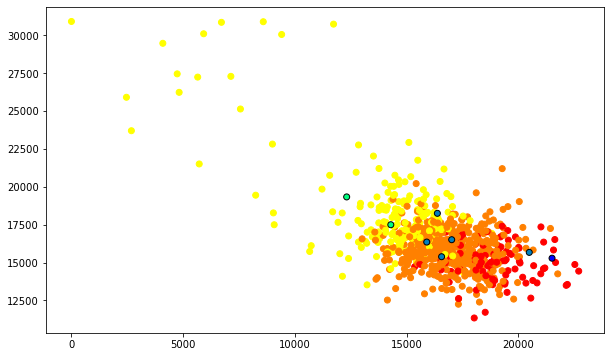

In [54]:
plt.figure(figsize = (10,6))
plt.scatter(m_clans['attack_trans'], m_clans['def_trans'], c = m_clans['result_mapped'], cmap='autumn')
plt.scatter(july_sum['attack_trans'], july_sum['def_trans'], c = july_sum['result_mapped'], cmap='winter', edgecolors='k')
plt.show()

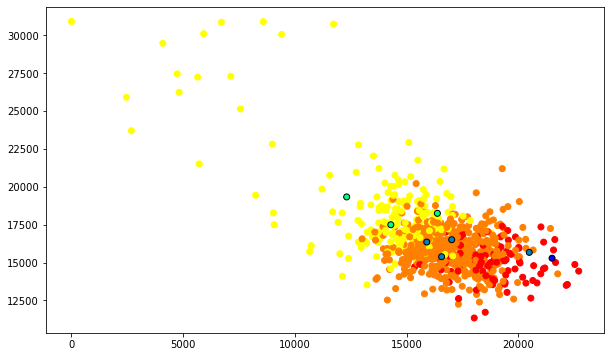

In [55]:
plt.figure(figsize = (10,6))
plt.scatter(m_clans['attack_trans'], m_clans['def_trans'], c = m_clans['result_mapped'], cmap='autumn')
plt.scatter(july_sum['attack_trans'], july_sum['def_trans'], c = predictions, cmap='winter', edgecolors='k')
plt.show()

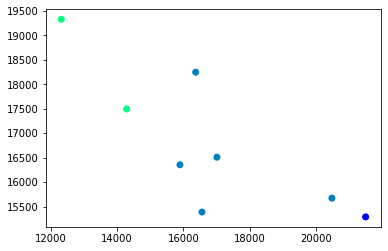

In [56]:
plt.scatter(july_sum['attack_trans'], july_sum['def_trans'], c = july_sum['result_mapped'], cmap='winter')

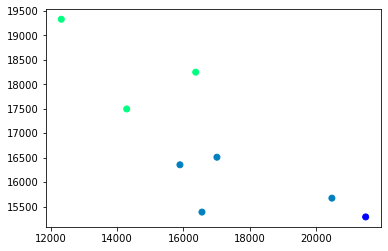

In [57]:
plt.scatter(july_sum['attack_trans'], july_sum['def_trans'], c = predictions, cmap='winter')

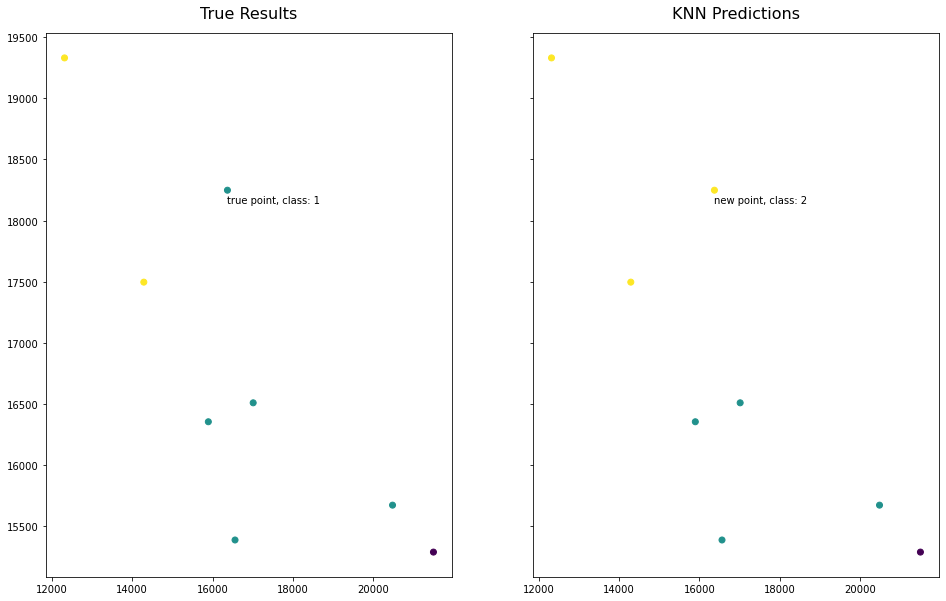

In [58]:
fig, ax = plt.subplots(1,2, figsize=(16,10), sharey=True)

ax[1].scatter(july_sum['attack_trans'], july_sum['def_trans'], c = predictions)
ax[1].text(x=july_sum['attack_trans'][0]-10.7, y=july_sum['def_trans'][0]-100.7, s=f"new point, class: {predictions[0]}")
ax[1].set_title('KNN Predictions', fontsize=16, pad=15)
ax[0].scatter(july_sum['attack_trans'], july_sum['def_trans'], c = july_sum['result_mapped'])
ax[0].text(x=july_sum['attack_trans'][0]-10.7, y=july_sum['def_trans'][0]-100.7, s=f"true point, class: {np.array(july_sum['result_mapped'])[0]}")
ax[0].set_title('True Results', fontsize=16, pad=15)
plt.show()